# Introduction to Numpy

## The Tao of Numpy

Numpy is the foundation upon which the entire Python scientific stack is built. Its general behavior (which takes some getting used to) and its power flow from an ethos that differs from that of vanilla Python in two main ways:

* **One data, many views:**  Humans tend to conceptualize mathematical objects using hiearchies of abstractions (vectors, rows vs. columns, matrices, tables, spreadsheets with tabs, etc) that help us visualize or otherwise get a handle on what mathematical objects are and what they mean in a given context.  But to computers, all numerical data is fundamentally 1D -- just a chain of bytes.  In fact, the same 1D chain of bytes can represent a bunch of different structures to us depending on how you parse it (including 2D, 3D, or  even 4D data).  Unlike plain Python, Numpy makes this distinction between the "raw" data and our *view* of it explicit.

* **Vectorization:**  Suppose you have a list of 10,000 timestamps $t$, and for each value, you need to compute $\frac{1}{2} t^2 + 5t + 4$. That's five operations per $t$ value: square $t$, multiply the result by 1/2, separately multiply $t$ by 5, add those results, and then add 4 to that.  In Python, you perform all five operations on *each* $t$ value, one at a time.  In Numpy, you perform each operation *simultaneously* on *all 10,000 $t$ values or intermediate results*.  Modern computer hardware, including GPUs, work the same way, so that difference is at the heart of Numpy's performance.

This hands-on introduction to using Numpy will largely be divided along the above two lines.

First, we will explore how Numpy's `ndarray` (N-dimensional array) captures this notion of "one data, many views".  This will require delving a little bit into Numpy's internals. This is important -- merely being exposed to this once, even if you constantly have to go look up details afterward to get your Numpy code right (we *all* do that), will save a future you weeks of frustration trying to squash vicious bugs that you just can't wrap your head around. An ounce of prevention really is worth a pound of cure here.

Then, once we have `ndarray`'s behavior as a data vessel down, we'll switch our focus to additional infrastructure that Numpy provides -- namely, "universal functions", or `ufunc`s and *broadcasting rules* -- that enable *vectorized operations* on those arrays.

Let's start by importing numpy and checking our version (yours may be a little different -- that's ok)

In [1]:
import numpy as np
print(np.__version__)

1.18.5


## Making arrays

### 1D arrays

`ndarray`s are often just called "arrays" for short.  The easiest way to make one is by passing a Python list, tuple, or range object to the `array()` constructor function:

In [10]:
arr1 = np.array([0,1,2])
arr2 = np.array((3.0,4.0,5.0,6.0))
arr3 = np.array((range(7,11)))

print(arr1)
print(arr2)
print(arr3)

[0 1 2]
[3. 4. 5. 6.]
[ 7  8  9 10]


In [6]:
# The outputs in the notebook may look like list, but they aren't lists
print([0,1,2], type([0,1,2]))
print(arr1, type(arr1))

[0, 1, 2] <class 'list'>
[0 1 2] <class 'numpy.ndarray'>


You can also feed arrays into `array()`:

In [14]:
arr4 = np.array(arr1)
print(arr4, type(arr4))

[0 1 2] <class 'numpy.ndarray'>


Numpy has a utility function `arange()` that works largely like its Python counterpart to simplify making an array without a Python list first, along with other common array-generating commands you find in MATLAB or R:

In [62]:
print('np.arange(5)        = %s' %np.arange(5))         # Array of 5 sequential integers.
print('np.zeros(5)         = %s' %np.zeros(5))          # Array of 5 zeros.
print('np.zeros_like(arr1)         = %s' %np.zeros_like(arr1))          # Array like arr1, with zeros.
print('np.ones(5)          = %s' %np.ones(5))           # Array of 5 ones.
print('np.ones_like(arr1)         = %s' %np.ones_like(arr1))          # Array like arr1, with ones.
print('np.empty(5)         = %s' %np.empty(5))          # Array of 5... whatever was sitting in memory.
print('np.empty_like(arr1)         = %s' %np.empty_like(arr1))          # Array like arr1, but empty.
print('np.linspace(0,10,5) = %s' %np.linspace(0,10,5))  # Length-5 evenly-spaced array from 0 to 10.
print('np.logspace(0,2,5) = %s' %np.logspace(0,2,5))    # Length-5 logarithmically-spaced array.
print('np.random.rand(5) = %s' %np.random.rand(5))    # Length-5 random numbers drawn uniformly from [0,1).

np.arange(5)        = [0 1 2 3 4]
np.zeros(5)         = [0. 0. 0. 0. 0.]
np.zeros_like(arr1)         = [0 0 0]
np.ones(5)          = [1. 1. 1. 1. 1.]
np.ones_like(arr1)         = [1 1 1]
np.empty(5)         = [1. 1. 1. 1. 1.]
np.empty_like(arr1)         = [1 1 1]
np.linspace(0,10,5) = [ 0.   2.5  5.   7.5 10. ]
np.logspace(0,2,5) = [  1.           3.16227766  10.          31.6227766  100.        ]
np.random.rand(5) = [0.78821671 0.13392728 0.64690817 0.5534075  0.83698021]


Like Python's `range`, `arange` even lets you go backward.  Unlike `range`, `arange` lets you do non-integer values and steps:

In [9]:
print(np.arange(6,0,-1))
print(np.arange(0, 4.0, 0.1))

[6 5 4 3 2 1]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9]


All of the above arrays have been 1D -- you access their elements just like you do in Python lists with only one index (including negative indices). 

In [11]:
print("arr1[2] = ",arr1[2])
print("arr2[-1] = ",arr2[-1])

arr1[2] =  2
arr2[-1] =  6.0


### dtypes

Unlike lists, Numpy arrays *MUST* have elements that are all of the same type.  The type is reflected in an array attribute `dtype` (`dtype`s themselves have some further complexity that is beyond our scope today):


In [25]:
print(arr1.dtype)
print(arr2.dtype)

int64
float64


`dtype`s are, in general, *not* the same as Python types.  They are more akin to C data types.  Numpy makes some default inferences based on what you pass it, but you can set the `dtype` to something else by giving the `dtype` keyword argument to `array()` (and to other commands).

Numpy also has attributes that show you the size (`itemsize`, in bytes, 1 byte = 8  bits) of each element and of the total array (`nbytes`), as well as how many elements are in the array (`size = nbytes/itemsize`):

In [33]:
intarr = np.array([1,2,3])
# size = nbytes // itemsize  (need floor division, technically)
print(intarr, intarr.dtype, intarr.itemsize, intarr.size, intarr.nbytes)

smallintarr = np.array([1,2,3],dtype=np.int16)
print(smallintarr, smallintarr.dtype, smallintarr.itemsize, smallintarr.size, smallintarr.nbytes)

flarr = np.array([1,2,3],dtype=np.float64)
print(flarr, flarr.dtype, flarr.itemsize, flarr.size, flarr.nbytes)

[1 2 3] int64 8 3 24
[1 2 3] int16 2 3 6
[1. 2. 3.] float64 8 3 24


Numpy has a few variables that give us some introspection on the available `dtype`s and notations for them (so you don't have to google as much):

In [26]:
np.typecodes

{'Character': 'c',
 'Integer': 'bhilqp',
 'UnsignedInteger': 'BHILQP',
 'Float': 'efdg',
 'Complex': 'FDG',
 'AllInteger': 'bBhHiIlLqQpP',
 'AllFloat': 'efdgFDG',
 'Datetime': 'Mm',
 'All': '?bhilqpBHILQPefdgFDGSUVOMm'}

In [27]:
np.sctypes

{'int': [numpy.int8, numpy.int16, numpy.int32, numpy.int64],
 'uint': [numpy.uint8, numpy.uint16, numpy.uint32, numpy.uint64],
 'float': [numpy.float16, numpy.float32, numpy.float64, numpy.float128],
 'complex': [numpy.complex64, numpy.complex128, numpy.complex256],
 'others': [bool, object, bytes, str, numpy.void]}

In [ ]:
np.sctypeDict  #This is a long output...

### 2D arrays

#### From sequences

If you pass the `array()` constructor a sequence of suitably-sized Python lists/tuples that would lay out naturally in a grid, it gives you a 2D array (not the difference in visual representation compared to Python lists):

In [15]:
l2d = [[1,2,3],[4,5,6]]
print(l2d, type(l2d))

arr2d = np.array([[7,8,9],[10,11,12]])
print(arr2d, type(arr2d))

[[1, 2, 3], [4, 5, 6]] <class 'list'>
[[ 7  8  9]
 [10 11 12]] <class 'numpy.ndarray'>


Arrays have an attribute `ndim` that reflects the dimension.  In Numpy, each dimension is called an **axis** (starting with axis-0, then axis-1), and they indicate the direction you're *moving along* (negative and positive indices shown below):

```
            -- axis1 -->
              -3  -2  -1
               0   1   2
  |          +---+---+---+
  |    -2, 0 |7  | 8 |  9|
  |          +---+---+---+
axis0  -1, 1 |10 |11 | 12|
  |          +---+---+---+
  | 
  V 
  ```

In [18]:
print(arr1.ndim)
print(arr2d.ndim)

2


`zeros, ones, empty, random.rand`, etc can take a shape argument (a tuple of ints) to make 2D (or higher dimension) pre-filled arrays. `identity` also makes square arrays with ones on the diagonal (really intended for linear algebra).

In [64]:
print(np.zeros((3,4)))
print(np.identity(4))

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


#### ASIDE: Are 1D arrays rows or columns?

What about our 1D arrays?  Were they "row" arrays or "column" arrays?  In Numpy, that's a meaningless question -- there's no distinction between the two in 1D. No orientation, just "extent".  Visuals are helpful, but fundamentally, arrays are nested sequences of indexed "slots".  The visuals (even the one numpy gives in its pretty-printed output) shouldn't be taken too literally.

Arrays support the same repeated index syntax that nested Python lists do, but they also support a (preferred) syntax: you can index them with a *tuple of integers* (whether you put the parentheses explicitly or not) inside the `[]`.  You can also do slicing this way.

In [24]:
print("l2d[1][2] = ", l2d[1][2])
print("arr2d[1][2] = ", arr2d[1][2])
# The lines below would be give syntax errors for Python lists...
# print("l2d[1,2] = ", l2d[1,2])
#print("l2d[(1,2)] = ", l2d[(1,2)])

# ...but are the preferred syntax for arrays (the form w/o parentheses is far more common)
print("arr2d[(1,2)] = ", arr2d[(1,2)])
print("arr2d[1,2] = ", arr2d[1,2])


# Slicing
print("arr2d[:,2] = ", arr2d[:,2])          # This picks out column 2 (along axis-1) for all indices along axis-0
print("arr2d[1,1:] = ", arr2d[1,1:])       # This picks out row 1 (along axis-0) for all indices >1 along axis-1
print("arr2d[1,1::-1] = ", arr2d[1,1::-1]) # Same, but entries along axis-1 are reversed

l2d[1][2] =  6
arr2d[1][2] =  12
arr2d[(1,2)] =  12
arr2d[1,2] =  12
arr2d[:,2] =  [ 9 12]
arr2d[1,1:] =  [11 12]
arr2d[1,1::-1] =  [11 10]


#### From a single 1D array with `reshape()`

The more interesting way to make a 2D array (which gets to the first bullet in the Tao of Numpy) is by "reshaping" a compatible 1D array (using the array's `reshape()` method, which is really a call to the `np.reshape()` function).  Shapes must be specified as an *integer tuple with parentheses*, although the `.reshape()` method (but *NOT* the `np.reshape()` function!) will let you omit the parentheses.

In [39]:
A = np.arange(24)  #1D
print(A)

A4x6 = A.reshape(4,6)  #2D, in row-major order ('C' order) by default
print(A4x6)

A3x8 = A.reshape(3,8)  #2D, row-major
print(A3x8)

A3x8F = A.reshape(3,8, order='F') #2D, column-major like Fortran
print(A3x8F)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]]
[[ 0  1  2  3  4  5  6  7]
 [ 8  9 10 11 12 13 14 15]
 [16 17 18 19 20 21 22 23]]
[[ 0  3  6  9 12 15 18 21]
 [ 1  4  7 10 13 16 19 22]
 [ 2  5  8 11 14 17 20 23]]


Crucially, *all four of these arrays share the same underlying data!*  Here are some ways to do the object introspection to prove it.

In [41]:
print(A.flags)  # A "owns" the data...

# But none of the others do
print(A4x6.flags)
print(A3x8.flags['OWNDATA'])  # for brevity
print(A3x8F.flags) # in full so you see the F_CONTIGUOUS and C_CONTIGUOUS flags
                   #(which are both true in 1D, b/c no distinction b/w rows and columns)

  C_CONTIGUOUS : True
  F_CONTIGUOUS : True
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

False
  C_CONTIGUOUS : False
  F_CONTIGUOUS : True
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False



In [54]:
# .base attribute is None if you own your data
print(A.base)
print(A3x8.base)
A4x6.base is A3x8F.base  # These two share a common base

None
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


True

In [42]:
np.shares_memory(A,A4x6)

True

In [43]:
np.shares_memory(A4x6,A3x8F)

True

In [45]:
# A as a row (2D, 1x24)
Arow = A.reshape(1,24)
print(Arow, Arow.ndim)

# A as a col (2D, 24x1)
Acol = A.reshape(24,1)
print(Acol, Acol.ndim)

[[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]] 2
[[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]
 [20]
 [21]
 [22]
 [23]] 2


#### Arrays are all 1D "under the hood"

![Array layout (from ipython-books.github.io)](arraylayout.png)

Information on how to translate motion along indices into traversal along the 1D data is kept in an array's `strides` atrribute.



In [48]:
# This is all in bytes
print(A.strides)
print(Arow.strides)
print(Acol.strides)
print(A4x6.strides)
print(A3x8.strides)
print(A3x8F.strides)

(8,)
(192, 8)
(8, 8)
(48, 8)
(64, 8)
(8, 24)


So a reshape is essentially instantaneous, a non-operation or "no-op".  All it does is change your *view* of the data.
Other operations work copy-free like this as well... (**EXERCISE** -- validate this in the cells below w/ some introspection)

In [46]:
print(Arow.ravel())  # Makes array 1D
print(Acol.squeeze()) # Eliminates any axes of length-1
print(A3x8.T)  # Transpose
print(A.view(np.int32)) # Reinterpret the bytes as 32-bit integers rather than 64-bit



[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
[[ 0  8 16]
 [ 1  9 17]
 [ 2 10 18]
 [ 3 11 19]
 [ 4 12 20]
 [ 5 13 21]
 [ 6 14 22]
 [ 7 15 23]]
[ 0  0  1  0  2  0  3  0  4  0  5  0  6  0  7  0  8  0  9  0 10  0 11  0
 12  0 13  0 14  0 15  0 16  0 17  0 18  0 19  0 20  0 21  0 22  0 23  0]


In [49]:
#Slicing doesn't copy...
np.shares_memory(A3x8[1:,2:5],A)

True

In [57]:
#... and slices (or regular indexing) can appear on the LHS of assignments, allowing us to change the underlying data across all arrays!
#  THIS IS THE SOURCE OF MANY MANY BUGS! BE CAREFUL!
print(A3x8[1:,2:5])
A3x8[1:,2:5] = [[10, 10, 10], [20,20,20]]
A3x8[0,0] = 99
print(A3x8)
print(A4x6)
print(A)

[[10 10 10]
 [20 20 20]]
[[99  1  2  3  4  5  6  7]
 [ 8  9 10 10 10 13 14 15]
 [16 17 20 20 20 21 22 23]]
[[99  1  2  3  4  5]
 [ 6  7  8  9 10 10]
 [10 13 14 15 16 17]
 [20 20 20 21 22 23]]
[99  1  2  3  4  5  6  7  8  9 10 10 10 13 14 15 16 17 20 20 20 21 22 23]


`np.newaxis` as part of a slicing tuple inserts a new axis of length 1 -- this also is a no-copy no-op.  We'll see later the utility.

In [63]:
A = np.arange(24)  # Let's make a new array and recycle the 'A' name for that. Quiz -- does A4x6 change?
Arow = A[np.newaxis,:]
print(Arow, np.shares_memory(Arow,A))
Acol = A[:,np.newaxis]
print(Acol, np.shares_memory(Acol,A))


[[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]] True
[[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]
 [20]
 [21]
 [22]
 [23]] True


Incidentally, you can always make a copy using an array's `.copy()` method.  Just be mindful of your memory budget.

In [70]:
A2 = A.copy()
np.shares_memory(A2,A)

False

#### Assembling from other multi-D arrays




Matrices can also be formed by joining NumPy arrays. There are several methods for doing this, including: row_stack/r_, column_stack/c_, hstack, vstack, and concatenate. These are demonstrated below and make new arrays with new underyling data (they copy).

(There are also reverse operations for :  hsplit, vsplit, etc -- we leave to you to google.  These do NOT copy -- they generate views that can access and mutate the original data, so be CAREFUL!)

**Joiners COPY**

**Splitters DO NOT COPY**

In [65]:
arr = np.arange(5)
print(arr)

## Join rows.
rows = np.row_stack([arr,arr])
print(rows)

## Join columns.
cols = np.column_stack([arr,arr])
print(cols)

[0 1 2 3 4]
[[0 1 2 3 4]
 [0 1 2 3 4]]
[[0 0]
 [1 1]
 [2 2]
 [3 3]
 [4 4]]


In [66]:
## np.hstack = join arrays along their columns.
print(np.hstack([arr,arr]))
print(np.hstack([arr.reshape(5,1), arr.reshape(5,1)]))

[0 1 2 3 4 0 1 2 3 4]
[[0 0]
 [1 1]
 [2 2]
 [3 3]
 [4 4]]


In [67]:
## np.vstack = join arrays along their rows.
np.vstack([arr,arr])
print(np.vstack([arr.reshape(5,1), arr.reshape(5,1)]))

[[0]
 [1]
 [2]
 [3]
 [4]
 [0]
 [1]
 [2]
 [3]
 [4]]


In [68]:
## np.concatenate = join arrays along specified axis.
## Default is first axis.
print(np.concatenate([arr, arr], axis=0))
print(np.concatenate([arr.reshape(5,1), arr.reshape(5,1)], axis=1))

[0 1 2 3 4 0 1 2 3 4]
[[0 0]
 [1 1]
 [2 2]
 [3 3]
 [4 4]]


### Higher dimensional arrays

It's worth just making sure you have some mental model (there could be others) for the indexing logic of, say, a 3D array.

In [69]:
arr3d = np.arange(8).reshape(2,2,2)  # Quiz: who owns the data?
print(arr3d)

[[[0 1]
  [2 3]]

 [[4 5]
  [6 7]]]


Useful to picture axis0 as tabs on a spreadsheet

```
   |      -- axis2 -->
   |    |
   |  axis1  [0, 1]
   |    |    [2, 3]
   |    V
axis0
   |      -- axis2 -->
   |    |
   |  axis1  [4, 5]
   |    |    [6, 7]
   V    V
```

In [83]:
# Ellipsis also is usable for indexing
arr4d = np.random.randint(0,9,(3,3,3,3))
print(arr4d)
arr4d[0,...,-1]  # Ellipsis specifies ':' for an unknown or unspecified number of axes;
                 #take the initial element along axis0 and last along axis3
# NOT a copy
np.shares_memory(arr4d[0,...,-1], arr4d)

[[[[4 5 7]
   [1 0 2]
   [0 4 1]]

  [[0 8 8]
   [8 8 4]
   [3 2 4]]

  [[4 7 5]
   [3 8 3]
   [8 1 1]]]


 [[[3 4 2]
   [1 8 2]
   [3 5 4]]

  [[1 7 4]
   [3 6 4]
   [4 0 6]]

  [[3 6 2]
   [3 5 6]
   [6 4 6]]]


 [[[6 4 6]
   [8 1 4]
   [7 2 4]]

  [[3 5 4]
   [5 5 0]
   [0 7 1]]

  [[5 6 4]
   [8 3 6]
   [3 5 8]]]]


True

### Fancy indexing

#### Indexing by arrays of integers

Arrays support another fun  form of indexing: if the index is an array of integers (or tuples of integers, for >1D), numpy returns an array with just the elements from those indices.  THIS WILL BE A COPY!  So the original data are safe from interference, but if it's a lot of data, you may be using a lot of extra memory.

In [78]:
Apart = A[[7,-4,2,-8]]
print(Apart)
np.shares_memory(Apart,A)

arr3d[[0,1],[1,1],[1,0]]  # Let's take a minute to understand this example...

[ 7 20  2 16]


array([3, 6])

#### Indexing with arrays of booleans (masks)

If you slice or index an array X with an array of booleans that matches the shape along that axis or slice, it will return only the elements where the boolean array is True.  THIS WILL BE A COPY!  **(All fancy indexing generates copies!**)

In [133]:
## Construct an arbitrary 2d 10x10 array of integers on [0,10)
M = np.random.randint(0,10,(10,10))
print(M)
print(M[M < 6])  #  This makes a copy.

#np.where() also returns the indices where a condition is satisfied, and can accept additional
# arguments for what to put there

[[8 1 2 8 1 0 1 4 2 3]
 [8 3 9 3 7 3 6 7 6 3]
 [7 5 1 4 7 1 1 8 5 3]
 [3 2 1 2 3 1 4 9 4 0]
 [9 2 8 6 9 3 2 1 0 0]
 [1 4 6 9 5 6 9 8 2 8]
 [4 3 7 4 5 9 4 3 2 0]
 [7 0 7 8 1 8 0 5 6 0]
 [3 1 5 9 4 7 0 4 8 4]
 [4 3 6 1 4 0 3 6 1 0]]
[1 2 1 0 1 4 2 3 3 3 3 3 5 1 4 1 1 5 3 3 2 1 2 3 1 4 4 0 2 3 2 1 0 0 1 4 5
 2 4 3 4 5 4 3 2 0 0 1 0 5 0 3 1 5 4 0 4 4 4 3 1 4 0 3 1 0]


## Core NumPy Functions
NumPy also introduces a [number of useful functions](https://docs.scipy.org/doc/numpy/reference/) designed to operate efficiently over NumPy arrays. The following is a non-exhaustive overview of some important NumPy functions.

All these operations are **ufuncs**, meaning that they obey numpy broadcasting rules and operate on multiple data at once, elementwise (just as basic operations like +,-,* etc do).  These operations are *vectorized*.

## Broadcasting rules

Broadcasting refers to how numpy tries to make arrays with different shapes have the same shape (in an intelligent way) so as to allow simple syntaxes for elementwise operations.

That expands to multiple dimensions like this:

```
(a, b, ..., z) OP (a, b, ..., z) -> element wise
(a, b, ..., z) OP (a, 1, ..., z) -> length 1 instead of b -> duplicated b times
(a, b, ..., z) OP (b, ..., z) -> prepend a dimension of length 1 -> see above
```

The third rule explains scalars, but is a bit problematic. Try to use the second rule when possible instead.

In [137]:
A = np.arange(24).reshape(2,3,4)
print(A)
B = np.arange(4)
print(B)


print(A + 8)
print(A * 8)
print(A + B)

C = np.arange(3) # Not compatible w/ A or B, but...
print(A + C[:,np.newaxis]) #... this is

[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]
[0 1 2 3]
[[[ 8  9 10 11]
  [12 13 14 15]
  [16 17 18 19]]

 [[20 21 22 23]
  [24 25 26 27]
  [28 29 30 31]]]
[[[  0   8  16  24]
  [ 32  40  48  56]
  [ 64  72  80  88]]

 [[ 96 104 112 120]
  [128 136 144 152]
  [160 168 176 184]]]
[[[ 0  2  4  6]
  [ 4  6  8 10]
  [ 8 10 12 14]]

 [[12 14 16 18]
  [16 18 20 22]
  [20 22 24 26]]]
[[[ 0  1  2  3]
  [ 5  6  7  8]
  [10 11 12 13]]

 [[12 13 14 15]
  [17 18 19 20]
  [22 23 24 25]]]


### Mathematical functions

NumPy includes a variety of mathematical functions. All of these can be applied across an entire matrix or across arrays.

In [108]:
np.mean;      # Mean of an array or matrix.
np.median;    # Median of an array or matrix.
np.max;       # Max of an array or matrix.
np.min;       # Min of an array or matrix.
np.sum;       # Sum of an array or matrix.
np.cumsum;    # Cumulative sum over an array.
np.prod;      # Element-wise multiplication of an array.
np.divide;    # Element-wise division of two arrays.
np.diff;      # Pairwise difference of elements of an array.
np.exp;       # Exponential transform.
np.log;       # Natural logarithm.
np.log10;     # Base-10 logarithm.
np.cos;       # Cosine.
np.sin;       # Sine.

In [123]:
# Nan-safe versions of aggregators exist, e.g. np.nanmean().
# Aggregators will operate on the flat array, unless given a specific axis to traverse.
# They reduce the dimension by 1.
print(np.arange(10).reshape(2,5).mean(axis=0))
print(np.arange(10).reshape(2,5).mean(axis=1))

[2.5 3.5 4.5 5.5 6.5]
[2. 7.]


In [111]:
theta = np.linspace(-np.pi,np.pi,11)
print(theta)
print(np.cos(theta))

print(theta**2)

[-3.14159265 -2.51327412 -1.88495559 -1.25663706 -0.62831853  0.
  0.62831853  1.25663706  1.88495559  2.51327412  3.14159265]
[-1.         -0.80901699 -0.30901699  0.30901699  0.80901699  1.
  0.80901699  0.30901699 -0.30901699 -0.80901699 -1.        ]
[9.8696044  6.31654682 3.55305758 1.5791367  0.39478418 0.
 0.39478418 1.5791367  3.55305758 6.31654682 9.8696044 ]


### Rounding Functions

In [84]:
mat = np.linspace(0,1,5)
print('Original: %s' %mat)
print('np.round: %s' %np.round(mat, 1) )
print('np.floor: %s' %np.floor(mat) ) 
print('np.ceil:  %s' %np.ceil(mat) )

Original: [0.   0.25 0.5  0.75 1.  ]
np.round: [0.  0.2 0.5 0.8 1. ]
np.floor: [0. 0. 0. 0. 1.]
np.ceil:  [0. 1. 1. 1. 1.]


### Summary Functions

NumPy includes many functions to summarize an array. With the exception of `np.corrcoef`, all of these can be
applied across an entire matrix or across arrays.

In [85]:
np.min;           # Return the smallest element.
np.max;           # Return the largest element.
np.argmin;        # Return the index of the smallest element.
np.argmax;        # Return the index of the largest element.
np.mean;          # Compute the mean of an array.
np.median;        # Compute the median of an array.
np.std;           # Compute the standard deviation of an array.
np.var;           # Compute the variance (sd^2) of an array.
np.percentile;    # Compute the xth percentile of an array.
np.corrcoef;      # Compute the row-/col-wise correlation of a matrix.

In [86]:
## To give a few examples.
mat = np.vstack([ np.arange(5), np.arange(5)[::-1] ])
print('Original:\n%s' %mat)

Original:
[[0 1 2 3 4]
 [4 3 2 1 0]]


In [87]:
## Compute percentile.
print( '70%% (all):  %s' %np.percentile(mat, 70) )

## Compute mean across rows.
print('70%% (rows): %s' %np.percentile(mat, 70, axis=1) )

## Compute mean across cols.
print('70%% (cols): %s' %np.percentile(mat, 70, axis=0) )

70% (all):  3.0
70% (rows): [2.8 2.8]
70% (cols): [2.8 2.4 2.  2.4 2.8]


In [88]:
## Compute correlation.
print('Correlation:\n', np.corrcoef(mat))

Correlation:
 [[ 1. -1.]
 [-1.  1.]]


### Set Functions
NumPy includes functions for identifying unique elements within or between arrays.

In [89]:
## Define two arrays for example.
arr1 = np.array([41, 16, 34, 0, 2, 20, 19, 14, 22, 15, 18, 9, 35, 41])
arr2 = np.array([42, 22, 40, 7, 33, 0, 12, 19, 44, 10, 31, 11, 11, 49])

In [90]:
## Sort elements (ascending order).
np.sort(arr1)

array([ 0,  2,  9, 14, 15, 16, 18, 19, 20, 22, 34, 35, 41, 41])

In [91]:
## Return unique elements.
np.unique(arr1)

array([ 0,  2,  9, 14, 15, 16, 18, 19, 20, 22, 34, 35, 41])

In [92]:
## Return unique elements, count number of appearances.
np.unique(arr1, return_counts=True)

(array([ 0,  2,  9, 14, 15, 16, 18, 19, 20, 22, 34, 35, 41]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2]))

In [93]:
## Find the elements of array-1 in array-2.
np.in1d(arr1, arr2)

array([False, False, False,  True, False, False,  True, False,  True,
       False, False, False, False, False])

In [94]:
## Return all unique elements of arrays 1 & 2.
np.union1d(arr1, arr2)

array([ 0,  2,  7,  9, 10, 11, 12, 14, 15, 16, 18, 19, 20, 22, 31, 33, 34,
       35, 40, 41, 42, 44, 49])

In [95]:
## Return all elements belonging to both arrays 1 & 2.
np.intersect1d(arr1, arr2)

array([ 0, 19, 22])

### Replacing List Comprehensions

NumPy includes a number of very helpful functions that allow you to apply a Python function conveniently along parts of an array without Python `for` loops (np.apply_along_axis, np.apply_over_axes). We will illustrate with a simple example of standard-scoring (z-scoring) a matrix.

`np.where()` is another function that facilitates masking or selection based on satisfaction of a boolean condition.

In [96]:
## Define the standard score (z-score) function.
def zscore(arr): 
    return (arr - arr.mean()) / arr.std()

## Define a simple matrix.
mat = np.arange(12).reshape(2,6)
print(mat)

[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]]


In [113]:
zmat = np.apply_along_axis(zscore, axis=1, arr=mat).round(2)
print(zmat)
print(zscore(mat))

[[-1.46 -0.88 -0.29  0.29  0.88  1.46]
 [-1.46 -0.88 -0.29  0.29  0.88  1.46]]
[[-1.59325501 -1.30357228 -1.01388955 -0.72420682 -0.43452409 -0.14484136]
 [ 0.14484136  0.43452409  0.72420682  1.01388955  1.30357228  1.59325501]]


In [114]:
#np.where
amat = np.where(zmat < 0, 0, 1)
print(zmat)

[[-1.46 -0.88 -0.29  0.29  0.88  1.46]
 [-1.46 -0.88 -0.29  0.29  0.88  1.46]]


### Matrix Math
NumPy supports matrix operations. The simplest operator is transposition.

In [115]:
## Generate random matrix.
X = np.random.normal(0,1,(5,5))

print(X)      # Print original matrix.
print(X.T)    # Print transposed matrix.

[[ 0.07809322 -0.35906033 -0.42326707  0.53541049 -0.33481344]
 [ 1.03301139 -0.06532025 -1.66728115 -0.96333071 -1.717498  ]
 [ 1.18328736  1.97839354  0.09121523  0.50651603  1.21895868]
 [ 1.85255839  1.43943463  1.82091338 -0.66335402 -0.5010529 ]
 [ 1.35783644 -1.36236434 -1.28690896  0.48191277  2.85785447]]
[[ 0.07809322  1.03301139  1.18328736  1.85255839  1.35783644]
 [-0.35906033 -0.06532025  1.97839354  1.43943463 -1.36236434]
 [-0.42326707 -1.66728115  0.09121523  1.82091338 -1.28690896]
 [ 0.53541049 -0.96333071  0.50651603 -0.66335402  0.48191277]
 [-0.33481344 -1.717498    1.21895868 -0.5010529   2.85785447]]


In [116]:
# Shorthand @ for matrix multiplication (or np.dot() more generally -- this is native Python now)
X @ X

array([[-0.32840413,  0.38485119,  1.93280236, -0.34320335, -1.15052338],
       [-6.07638585, -2.7119785 , -0.02429212, -0.41714941, -6.69170522],
       [ 4.83754064, -1.30521021, -4.43743165, -0.97466851, -0.45306468],
       [ 1.87703847,  2.57104066, -3.58107489,  0.72612417, -1.97243019],
       [ 1.9491873 , -6.14432466, -1.22094587,  2.44512504,  8.24241565]])

In [117]:
# Inner and outer products
x = np.random.normal(0,1,size=5)

## Inner product.
inner = np.inner(x,x)
print(inner)

## Outer product.
outer = np.outer(x,x)
print(outer)

0.7109317316465865
[[ 0.01138877  0.04592503  0.07250101  0.02407425 -0.00467572]
 [ 0.04592503  0.18519189  0.29235906  0.09707898 -0.01885475]
 [ 0.07250101  0.29235906  0.4615419   0.15325681 -0.02976564]
 [ 0.02407425  0.09707898  0.15325681  0.05088953 -0.0098838 ]
 [-0.00467572 -0.01885475 -0.02976564 -0.0098838   0.00191964]]


### Linear Algebra Functions

NumPy includes an entire submodule dedicated to efficient linear algebra functions (though it should be noted that SciPy has reimplemented them for maximal efficiency). See np.linalg for a full list of commands.

In [118]:
## Define a simple matrix.
mat = np.arange(16).reshape(4,4)
print(mat)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]


In [119]:
## Return diagonal of matrix
print(np.diag(mat))

[ 0  5 10 15]


In [120]:
## Return upper triangular matrix
print(np.triu(mat))    

[[ 0  1  2  3]
 [ 0  5  6  7]
 [ 0  0 10 11]
 [ 0  0  0 15]]


In [121]:
## Other linear algebra operations include:
np.linalg.norm;        # Vector or matrix norm
np.linalg.inv;         # Inverse of a square matrix
np.linalg.det;         # Determinant of a square matrix
np.linalg.eig;         # Eigenvalues and vectors of a square matrix
np.linalg.cholesky;    # Cholesky decomposition of a matrix
np.linalg.svd;         # Singular value decomposition of a matrix
np.linalg.lstsq;       # Solve linear least-squares problem

# Introduction to Data Visualization
## Matplotlib
Matplotlib, or the Matlab plotting library, is the core plotting package of the scientific python distribution. The origial goal of Matplotlib was to recreate all of the plotting capabilities of Matlab in python. 

We will go through the syntax of plotting the five most common types of plots: bar plots, line plots, scatter plots, boxplots, and heatmaps. We will also cover adding details to plots (e.g. axes, titles, legends, errorbars), making multiple plots in one figure, and scaling/sizing plots.

In [124]:
import matplotlib.pyplot as plt
%matplotlib inline 

## NOTE: The second line is a bit of notebook magic! 
## It's a jupyter-notebook shortcut that makes all
## plots be displayed at the bottom of a cell.

### Figures & Axes
A brief note: In Matplotlib jargon, an axis is a plot (e.g. barplot, scatterplot) and a figure is the canvas containing all plots. The most basic figure contains a single axis (i.e. one plot). More complex figures may have multiple plots of different sizes and numbers per row. 

This distinction is important because certain graphical tweaks can only be applied to figures or axes. For example, figures control the size of the canvas, the spacing of plots, and saving figures. Axes control plot-specific features, including labels, titles, and legends. To start, we will only generate figures with one plot. Later, we will introduce drawing multiple plots per figure.

### Initializing Figures

There are many ways of initializing figures in Matplotlib. We will cover the three main functions. Note these involve slightly different syntaxes and allow for slightly different control.

#### Subplot

The first function, `plt.subplot`, requires the user to define an *a priori* canvas layout and then initialize each axis separately.

In [ ]:
## Subplot example: Figure needs to be called.
fig = plt.figure(figsize=(8,4))

## Make 2x2 figure.
ax = plt.subplot(2,2,1)
ax.text(0.5,0.5,'ax1', fontsize=18, ha='center', va='center')

ax = plt.subplot(2,2,2)
ax.text(0.5,0.5,'ax2', fontsize=18, ha='center', va='center')

ax = plt.subplot(2,2,3)
ax.text(0.5,0.5,'ax3', fontsize=18, ha='center', va='center')

ax = plt.subplot(2,2,4)
ax.text(0.5,0.5,'ax4', fontsize=18, ha='center', va='center')

plt.tight_layout()

#### Subplots

The second function, `plt.subplots`, requires the user to define an *a priori* canvas layout but initializes all (equal sized) axes at once. 

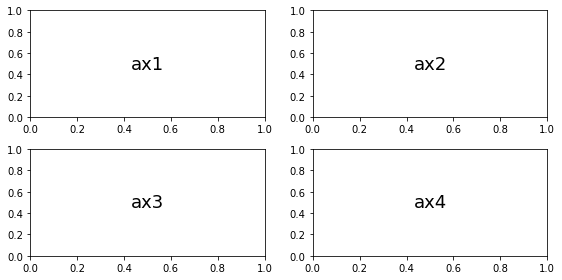

In [125]:
## Subplot example: Figure needs to be called.
fig, axes = plt.subplots(2,2,figsize=(8,4))

for i, ax in enumerate(axes.flatten()):
    ax.text(0.5,0.5,f'ax{i+1}',fontsize=18, ha='center', va='center')

plt.tight_layout()

#### Subplot2grid
With the third function, `plt.subplot2grid()`, the user defines geometry of the canvas and the location of the subplot in the grid. Importantly, this function allows for non-equal axis sizes. Here we present an example geometry for a 3x3 grid.

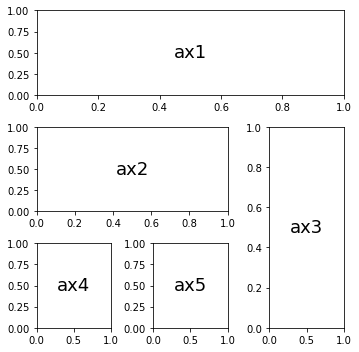

In [126]:
## subplot2grid example: Figure must be called.
fig = plt.figure(figsize=(5,5))

ax = plt.subplot2grid((3, 3), (0, 0), colspan=3)
ax.text(0.5,0.5,'ax1', fontsize=18, ha='center', va='center')

ax = plt.subplot2grid((3, 3), (1, 0), colspan=2)
ax.text(0.5,0.5,'ax2', fontsize=18, ha='center', va='center')

ax = plt.subplot2grid((3, 3), (1, 2), rowspan=2)
ax.text(0.5,0.5,'ax3', fontsize=18, ha='center', va='center')

ax = plt.subplot2grid((3, 3), (2, 0))
ax.text(0.5,0.5,'ax4', fontsize=18, ha='center', va='center')

ax = plt.subplot2grid((3, 3), (2, 1))
ax.text(0.5,0.5,'ax5', fontsize=18, ha='center', va='center')

plt.tight_layout()

### Barplots
Barplots are probably the least intuitive plot in Matplotlib because the user must specify the starting point and width of the bars (this is in contrast to other languages that automatically assign x-coordinates to the bars). Though clunky, this does provide some additional control to the user. 

In this example, we will plot the average response within subjects.

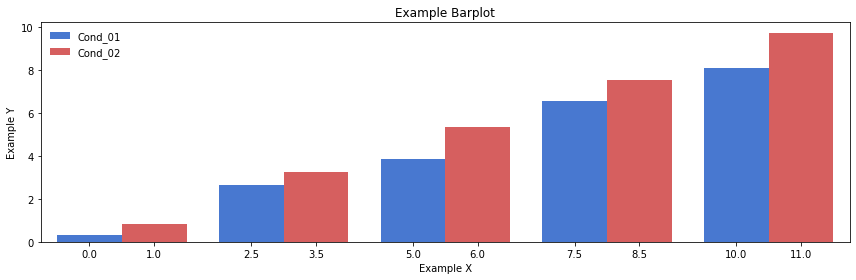

In [127]:
## Initialize canvas.
fig, ax = plt.subplots(1,1,figsize=(12,4))

## Simulate data.
y = np.arange(10) + np.random.normal(0,0.5,10)
x = np.arange(10) + np.arange(10) // 2 * 0.5

## Plot bars.
ax.bar(x[::2], y[::2], width=1.0, color='#4878d0', label='Cond_01')
ax.bar(x[1::2], y[1::2], width=1.0, color='#d65f5f', label='Cond_02')

## Add details.
ax.set(xticks=x, xlim=(-0.75, 11.75), xlabel='Example X', ylabel='Example Y', title='Example Barplot')
ax.legend(loc=2, frameon=False)

plt.tight_layout();

### Lineplots
Lineplots are more intuitive than are barplots, requiring at the minimum only the x- and y-datapoints. Many tweaks and embellishments can similarly be added. 

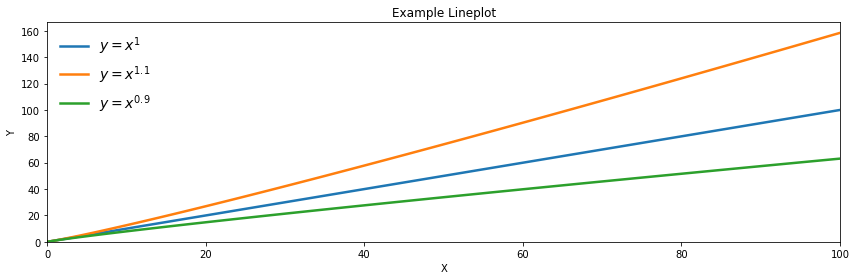

In [128]:
## Initialize canvas.
fig, ax = plt.subplots(1,1,figsize=(12,4))

## Simulate data.
x = np.linspace(0,100,100)

## Plot lines.
for alpha in [1, 1.1, 0.9]:
    ax.plot(x, x**alpha, lw=2.5, label=r'$y = x^{%s}$' %alpha)

## Add details.
ax.set(xlim=(x.min(), x.max()), xlabel='X', ylim=(0), ylabel='Y', title='Example Lineplot')
ax.legend(loc=2, frameon=False, fontsize=14)

plt.tight_layout()

### Scatterplots
The synxtax of scatterplots is similar to that of lineplots. Whereas lineplots have different [linestyles](https://matplotlib.org/examples/lines_bars_and_markers/line_styles_reference.html), scatterplots have different [marker styles](https://matplotlib.org/api/markers_api.html). 

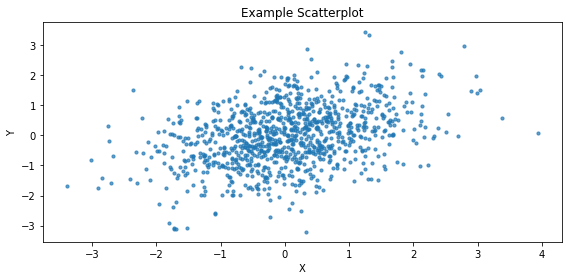

In [129]:
## Initialize canvas.
fig, ax = plt.subplots(1,1,figsize=(8,4))

## Simulate data.
mu = [0,0]
cov = [[1.0,0.4],[0.4,1.0]]
x, y = np.random.multivariate_normal(mu, cov, 1000).T

## Plot scatterplot.
ax.scatter(x, y, s=10, alpha=0.7)

## Add details.
ax.set(xlabel='X', ylabel='Y', title='Example Scatterplot')

plt.tight_layout()

### Histrograms
Histograms are very easy fortunately.

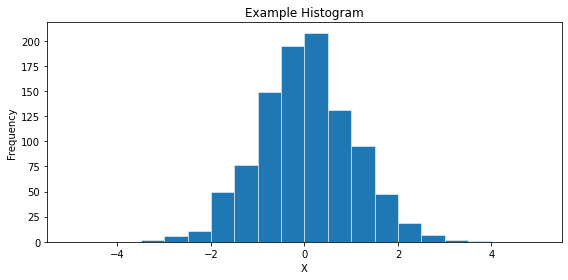

In [130]:
## Initialize canvas.
fig, ax = plt.subplots(1,1,figsize=(8,4))

## Plot scatterplot.
ax.hist(x, bins=np.linspace(-5,5,21), lw=0.5, edgecolor='w')

## Add details.
ax.set(xlabel='X', ylabel='Frequency', title='Example Histogram')

plt.tight_layout()

### Heatmaps
Heatmaps are very useful plots, but slightly counterintuitive in Matplotlib.

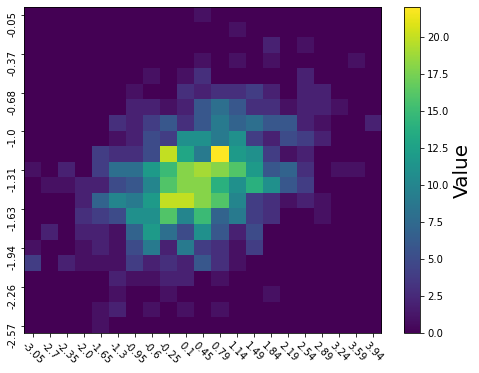

In [131]:
## Initialize canvas.
fig, ax = plt.subplots(1,1,figsize=(8,6))

## Compute 2d histogram.
counts, xbins, ybins = np.histogram2d(x,y,bins=21)

## Plot heatmap.
cbar = ax.imshow(counts, aspect='auto', origin='lower', vmin=0)

## Add details.
xticklabels = (xbins[:-1] + np.diff(xbins)).round(2)
yticklabels = (ybins[:-1] + np.diff(ybins)).round(2)
ax.set(xticks=np.arange(xticklabels.size))
ax.set_xticklabels(xticklabels, rotation=-45)
ax.set_yticklabels(yticklabels, rotation=90)

cbar = plt.colorbar(cbar, ax=ax);
cbar.ax.tick_params(labelsize=10) 
cbar.set_label('Value', fontsize=20)

### Gridspec plots

Gridspec objects are similar to subplot2grid in that they allow different sized plots within a figure. Gridspec objects also allow spacing configuration of axes within the figure. To give an example, we embed two sets of six plots with a large gap between them.

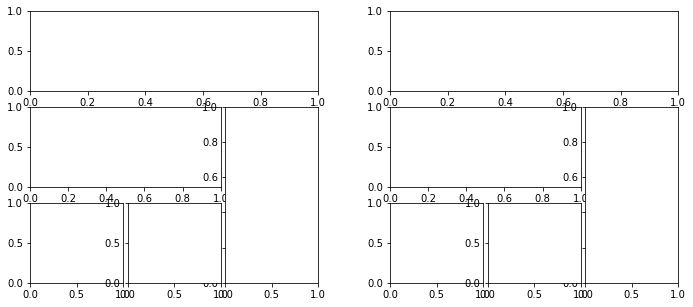

In [132]:
import matplotlib.gridspec as gridspec

## Initialize figure.
fig = plt.figure(figsize=(10,5))

## Define first 3x3 grid. 
gs = gridspec.GridSpec(3, 3)

## Update spacing parameters such that the figures can only
## extend to the 0.45 fraction of the figure.
gs.update(left=0.05, right=0.45, wspace=0.05)

## Create plots by indexing into grid.
ax1 = plt.subplot(gs[0, :])
ax2 = plt.subplot(gs[1, :-1])
ax3 = plt.subplot(gs[1:, -1])
ax4 = plt.subplot(gs[-1, 0])
ax5 = plt.subplot(gs[-1, -2])

## Define second 3x3 grid. 
gs = gridspec.GridSpec(3, 3)

## Update spacing parameters such that the figures can only
## start at 0.55 fraction of the figure.
gs.update(left=0.55, right=0.95, wspace=0.05)

## Create plots by indexing into grid.
ax1 = plt.subplot(gs[0, :])
ax2 = plt.subplot(gs[1, :-1])
ax3 = plt.subplot(gs[1:, -1])
ax4 = plt.subplot(gs[-1, 0])
ax5 = plt.subplot(gs[-1, -2])